In [9]:
import pandas as pd
import numpy as np
import random as rd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create sample dataset

In [2]:
genes =['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt,*ko], index=genes)

data.head()



,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size = 5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size = 5)

In [5]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,476,443,497,489,455,559,576,559,569,540
gene2,542,531,534,503,532,198,211,184,229,217
gene3,791,794,786,809,803,196,191,156,158,167
gene4,485,458,437,407,433,326,338,315,303,329
gene5,69,70,77,73,66,421,402,404,388,394


In [8]:
#centering data 
scaled_data = preprocessing.scale(data.T)

In [7]:
data.shape

(100, 10)

# PCA

In [10]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Plot

In [12]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1) # % of variaton that each pc accounts for
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1 )] # create labels 

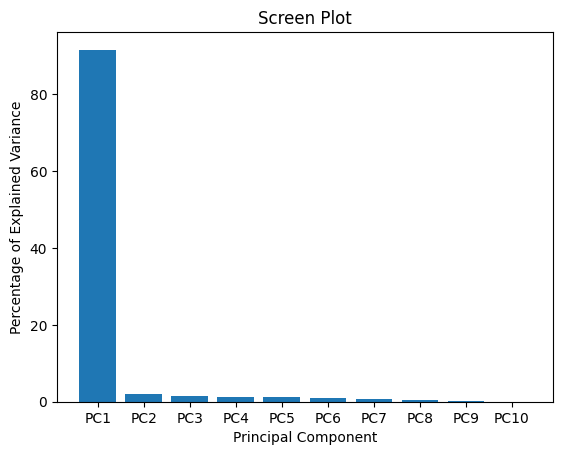

In [14]:
fig, ax = plt.subplots() 
ax.bar(x = range(1, len(per_var) + 1), height = per_var, tick_label=labels)
ax.set_ylabel('Percentage of Explained Variance')
ax.set_xlabel('Principal Component')
ax.set_title('Screen Plot')
plt.show()

## using PC1 and PC2 to recreate the data

In [15]:
pca_df = pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)

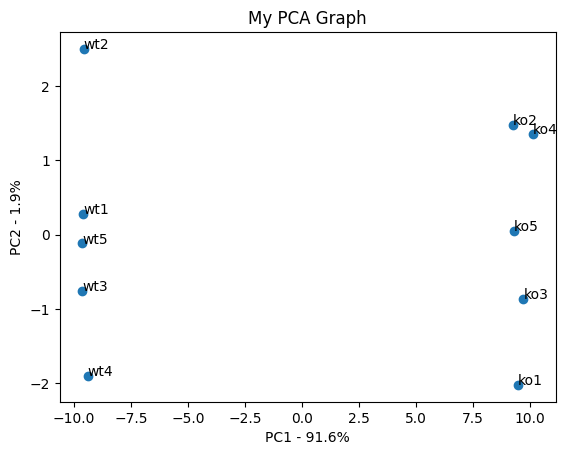

In [16]:
fig, ax = plt.subplots()
ax.scatter(pca_df.PC1,pca_df.PC2)
ax.set_xlabel(f'PC1 - {per_var[0]}%')
ax.set_ylabel(f'PC2 - {per_var[1]}%')
ax.set_title('My PCA Graph')
for sample in pca_df.index:
    ax.annotate(sample,(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()